# Что будет с вашим финансовым состоянием, если вы не будете курить на протяжении 10 лет?

In [1]:
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')
import numpy as np
from datetime import datetime, timedelta

## Вводные данные:
Курильщик в возрасте 30 лет хочет бросить курить. Я решил смоделировать что будет, если он всё-таки бросит курить, и начнёт инвестировать.
В качестве аналогии я взял среднюю на мой взгляд розничную цену на пачку сигарет в 2022, а котировки за 2012-2022.
Табачная инфляция 10% годовых.

# Реальный пример с пиф ВТБ на ИМ(ОПИФ рыночных финансовых инструментов «ВТБ - Индекс МосБиржи»	)

## Руками забираем котировки с сайта УК, и чистим данные

In [68]:
quotes = 'quotes.xlsx'
data = pd.read_excel(quotes)
data

,ОПИФ рыночных финансовых инструментов «ВТБ - Индекс МосБиржи»,Unnamed: 1,Unnamed: 2
0,c 01.01.2012 по 01.01.2022,NaN,NaN
1,Дата,"Стоимость пая, руб.","Стоимость чистых активов, руб."
2,30.12.2021,9793.51,5359968453.22
3,29.12.2021,9691.53,5304154644.83
4,28.12.2021,9711.63,5294001467.7
...,...,...,...
2468,16.01.2012,2584.54,312728856.32
2469,13.01.2012,2601.12,316186632.58
2470,12.01.2012,2611.18,317492379.99
2471,11.01.2012,2605.63,317064042.32


In [69]:
data.drop(['Unnamed: 2'], axis = 1, inplace=True)
data

,ОПИФ рыночных финансовых инструментов «ВТБ - Индекс МосБиржи»,Unnamed: 1
0,c 01.01.2012 по 01.01.2022,NaN
1,Дата,"Стоимость пая, руб."
2,30.12.2021,9793.51
3,29.12.2021,9691.53
4,28.12.2021,9711.63
...,...,...
2468,16.01.2012,2584.54
2469,13.01.2012,2601.12
2470,12.01.2012,2611.18
2471,11.01.2012,2605.63


In [70]:
data.drop([0, 1], inplace=True)
data

,ОПИФ рыночных финансовых инструментов «ВТБ - Индекс МосБиржи»,Unnamed: 1
2,30.12.2021,9793.51
3,29.12.2021,9691.53
4,28.12.2021,9711.63
5,27.12.2021,9677.31
6,24.12.2021,9557.79
...,...,...
2468,16.01.2012,2584.54
2469,13.01.2012,2601.12
2470,12.01.2012,2611.18
2471,11.01.2012,2605.63


In [71]:
data.reset_index(drop=True, inplace=True)

In [72]:
data.iloc[0]

ОПИФ рыночных финансовых инструментов «ВТБ - Индекс МосБиржи»    30.12.2021
Unnamed: 1                                                          9793.51
Name: 0, dtype: object

In [73]:
data = data.iloc[::-1]


In [74]:
data.reset_index(drop=True, inplace=True)
data

,ОПИФ рыночных финансовых инструментов «ВТБ - Индекс МосБиржи»,Unnamed: 1
0,10.01.2012,2607.79
1,11.01.2012,2605.63
2,12.01.2012,2611.18
3,13.01.2012,2601.12
4,16.01.2012,2584.54
...,...,...
2466,24.12.2021,9557.79
2467,27.12.2021,9677.31
2468,28.12.2021,9711.63
2469,29.12.2021,9691.53


In [75]:
data.rename(columns = {'ОПИФ рыночных финансовых инструментов «ВТБ - Индекс МосБиржи»': 'Date', 'Unnamed: 1': 'Price'}, inplace=True)

In [76]:
import calendar
data

,Date,Price
0,10.01.2012,2607.79
1,11.01.2012,2605.63
2,12.01.2012,2611.18
3,13.01.2012,2601.12
4,16.01.2012,2584.54
...,...,...
2466,24.12.2021,9557.79
2467,27.12.2021,9677.31
2468,28.12.2021,9711.63
2469,29.12.2021,9691.53


In [77]:
data.loc[[0], ['Date']]

,Date
0,10.01.2012


In [78]:
data['Cig_price'] = 0

In [79]:
data.Price = data.Price.astype(int )

### Данные вроде бы почистили, надо привести всё к нужным типам

In [80]:
data.dtypes

Date         object
Price         int32
Cig_price     int64
dtype: object

In [81]:
def change_date(date_str):
    datetime_obj = datetime.strptime(date_str, '%d.%m.%y')
    return datetime_obj


In [82]:
date = []
for i in data.Date:
    date.append(i.replace('.', '/'))

In [83]:
data['Date'] = date
data

,Date,Price,Cig_price
0,10/01/2012,2607,0
1,11/01/2012,2605,0
2,12/01/2012,2611,0
3,13/01/2012,2601,0
4,16/01/2012,2584,0
...,...,...,...
2466,24/12/2021,9557,0
2467,27/12/2021,9677,0
2468,28/12/2021,9711,0
2469,29/12/2021,9691,0


In [84]:
import datetime
dates = []
for i in data['Date']:
    date_str = i.split('/')
    date_date = datetime.datetime(int(date_str[2]), int(date_str[1]), int(date_str[0]))
    dates.append(date_date)

dates

[datetime.datetime(2012, 1, 10, 0, 0),
 datetime.datetime(2012, 1, 11, 0, 0),
 datetime.datetime(2012, 1, 12, 0, 0),
 datetime.datetime(2012, 1, 13, 0, 0),
 datetime.datetime(2012, 1, 16, 0, 0),
 datetime.datetime(2012, 1, 17, 0, 0),
 datetime.datetime(2012, 1, 18, 0, 0),
 datetime.datetime(2012, 1, 19, 0, 0),
 datetime.datetime(2012, 1, 20, 0, 0),
 datetime.datetime(2012, 1, 23, 0, 0),
 datetime.datetime(2012, 1, 24, 0, 0),
 datetime.datetime(2012, 1, 25, 0, 0),
 datetime.datetime(2012, 1, 26, 0, 0),
 datetime.datetime(2012, 1, 27, 0, 0),
 datetime.datetime(2012, 1, 30, 0, 0),
 datetime.datetime(2012, 1, 31, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0),
 datetime.datetime(2012, 2, 2, 0, 0),
 datetime.datetime(2012, 2, 3, 0, 0),
 datetime.datetime(2012, 2, 6, 0, 0),
 datetime.datetime(2012, 2, 7, 0, 0),
 datetime.datetime(2012, 2, 8, 0, 0),
 datetime.datetime(2012, 2, 9, 0, 0),
 datetime.datetime(2012, 2, 10, 0, 0),
 datetime.datetime(2012, 2, 13, 0, 0),
 datetime.datetime(2012, 2, 14, 

In [85]:
data['Date'] = dates

## Тут уже начинаем моделирование

In [86]:
Cig_price = [150]
for i in range(len(data['Date'])):
    if i > 1:
        if data['Date'][i-1].month != data['Date'][i].month:
            Cig_price.append(round(Cig_price[-1] * 1.008, 2))
        else:
            Cig_price.append(Cig_price[-1])

print(Cig_price)

#тут мы считаем стоимость пачки сигарет с индексацией на 10% годовых каждый месяц

[150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 152.41, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 153.63, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 154.86, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 156.1, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.35, 157.

In [87]:
Cig_price.append(319.69)

In [88]:
data['Cig_price'] = Cig_price

In [89]:
import calendar
Cig_price = []
for i in range(len(data['Date'])):
    if i != 0:
        if calendar.weekday(data['Date'][i].year, data['Date'][i].month, data['Date'][i].day) == 0:
            data['Cig_price'][i] *= 3
            # если день недели = понедельнику, то количество "выкуренных" пачек сигарет умножается на 3, так как мы перенаправляем финансы ещё и с выходных дней

C:\Users\Danil\AppData\Local\Temp/ipykernel_10152/31879888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cig_price'][i] *= 3


### Для инвестирования всего капитала мы проводим сплит фонда в 400 раз, аналогичен по стоимости фонд TMOS

In [90]:
spl_price = []
for i in data['Price']:
    spl_price.append(round(i/400, 2))

spl_price

[6.52,
 6.51,
 6.53,
 6.5,
 6.46,
 6.58,
 6.58,
 6.64,
 6.63,
 6.59,
 6.59,
 6.63,
 6.69,
 6.68,
 6.63,
 6.69,
 6.76,
 6.82,
 6.86,
 6.93,
 6.9,
 6.92,
 6.86,
 6.78,
 6.88,
 6.93,
 6.99,
 6.92,
 6.96,
 7.0,
 6.92,
 6.87,
 6.96,
 7.05,
 7.01,
 7.05,
 7.03,
 7.08,
 7.17,
 7.01,
 6.92,
 7.08,
 7.09,
 7.12,
 7.2,
 7.21,
 7.16,
 7.05,
 6.94,
 6.89,
 6.8,
 6.77,
 6.88,
 6.91,
 6.78,
 6.65,
 6.72,
 6.74,
 6.81,
 6.72,
 6.68,
 6.68,
 6.6,
 6.67,
 6.65,
 6.62,
 6.65,
 6.59,
 6.5,
 6.51,
 6.58,
 6.61,
 6.51,
 6.45,
 6.46,
 6.41,
 6.44,
 6.49,
 6.49,
 6.38,
 6.22,
 6.12,
 6.19,
 6.12,
 6.09,
 5.99,
 5.89,
 5.88,
 5.78,
 5.65,
 5.69,
 5.75,
 5.62,
 5.61,
 5.69,
 5.74,
 5.81,
 5.79,
 5.82,
 5.75,
 5.75,
 5.76,
 5.77,
 5.84,
 5.86,
 5.91,
 5.94,
 5.91,
 6.02,
 6.1,
 6.13,
 6.08,
 6.04,
 5.95,
 5.88,
 5.92,
 5.97,
 5.96,
 6.08,
 6.16,
 6.28,
 6.32,
 6.38,
 6.28,
 6.26,
 6.29,
 6.21,
 6.15,
 6.23,
 6.27,
 6.33,
 6.32,
 6.36,
 6.28,
 6.12,
 6.06,
 6.07,
 6.08,
 6.17,
 6.3,
 6.25,
 6.25,
 6.22,
 6.22,
 

In [91]:
data['Splited_price'] = spl_price
data

,Date,Price,Cig_price,Splited_price
0,2012-01-10,2607,150.00,6.52
1,2012-01-11,2605,150.00,6.51
2,2012-01-12,2611,150.00,6.53
3,2012-01-13,2601,150.00,6.50
4,2012-01-16,2584,450.00,6.46
...,...,...,...,...
2466,2021-12-24,9557,387.20,23.89
2467,2021-12-27,9677,1161.60,24.19
2468,2021-12-28,9711,387.20,24.28
2469,2021-12-29,9691,387.20,24.23


In [92]:
data['Quantity_shares'] = data['Cig_price'] // data['Splited_price']
#счиатем сколько акций мы можем купить каждый день отказа от курения

In [93]:
data['Quantity_shares'].sum()

78143.0

In [127]:
data

,Date,Price,Cig_price,Splited_price,Quantity_shares,Count_shares,Wealth
0,2012-01-10,2607,150.00,6.52,23.0,23.0,149.96
1,2012-01-11,2605,150.00,6.51,23.0,46.0,299.46
2,2012-01-12,2611,150.00,6.53,22.0,68.0,444.04
3,2012-01-13,2601,150.00,6.50,23.0,91.0,591.50
4,2012-01-16,2584,450.00,6.46,69.0,160.0,1033.60
...,...,...,...,...,...,...,...
2466,2021-12-24,9557,387.20,23.89,16.0,78052.0,1864662.28
2467,2021-12-27,9677,1161.60,24.19,48.0,78100.0,1889239.00
2468,2021-12-28,9711,387.20,24.28,15.0,78115.0,1896632.20
2469,2021-12-29,9691,387.20,24.23,15.0,78130.0,1893089.90


In [94]:
count_shares = []
for i in range(len(data['Quantity_shares'])):
    if i == 0:
        count_shares.append(data['Quantity_shares'][i])
    else:
        count_shares.append(count_shares[-1] + data['Quantity_shares'][i])

data['Count_shares'] = count_shares

In [130]:
data['Wealth'] = data['Count_shares'] * data['Splited_price']
#накопленная сумма каждый день моделирования

In [96]:
#data.to_excel('бпиф.xlsx')


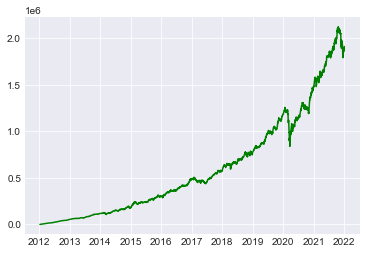

In [129]:
fig, ax1 = plt.subplots()

x = data['Date']
y1 = data['Wealth']


ax2 = ax1.plot()

ax1.plot(x, y1, 'g-')


## А если 30 лет?

In [98]:
data

,Date,Price,Cig_price,Splited_price,Quantity_shares,Count_shares,Wealth
0,2012-01-10,2607,150.00,6.52,23.0,23.0,149.96
1,2012-01-11,2605,150.00,6.51,23.0,46.0,299.46
2,2012-01-12,2611,150.00,6.53,22.0,68.0,444.04
3,2012-01-13,2601,150.00,6.50,23.0,91.0,591.50
4,2012-01-16,2584,450.00,6.46,69.0,160.0,1033.60
...,...,...,...,...,...,...,...
2466,2021-12-24,9557,387.20,23.89,16.0,78052.0,1864662.28
2467,2021-12-27,9677,1161.60,24.19,48.0,78100.0,1889239.00
2468,2021-12-28,9711,387.20,24.28,15.0,78115.0,1896632.20
2469,2021-12-29,9691,387.20,24.23,15.0,78130.0,1893089.90


In [99]:
data_by_year = pd.DataFrame(columns= ['Date', 'Quote'])

In [100]:
years = []
for i in range(2012, 2022):
    years.append(data[data['Date'] >= f'{i}-01-11'].iloc[0]['Date'])

In [101]:
data_by_year['Date'] = years

In [102]:
data_by_year

,Date,Quote
0,2012-01-11,NaN
1,2013-01-11,NaN
2,2014-01-13,NaN
3,2015-01-12,NaN
4,2016-01-11,NaN
5,2017-01-11,NaN
6,2018-01-11,NaN
7,2019-01-11,NaN
8,2020-01-13,NaN
9,2021-01-11,NaN


In [103]:
data[data['Date'] >= '2015-01-11'].iloc[0]['Date']

Timestamp('2015-01-12 00:00:00')

In [104]:
data.Date[data.Date == '2015-01-11'].index

Int64Index([], dtype='int64')

In [105]:
spl_prc = []
for i in data_by_year['Date']:
    spl_prc.append(data['Splited_price'][data.Date[data.Date == i].index[0]])

print(spl_prc)

[6.51, 6.81, 6.8, 7.15, 8.31, 11.21, 11.86, 13.47, 18.48, 21.55]


In [106]:
data_by_year['Quote'] = spl_prc

In [107]:
data_by_year.loc[len(data_by_year)] = [data.iloc[-1].Date, data.iloc[-1].Splited_price]


In [108]:
data_by_year

,Date,Quote
0,2012-01-11,6.51
1,2013-01-11,6.81
2,2014-01-13,6.80
3,2015-01-12,7.15
4,2016-01-11,8.31
5,2017-01-11,11.21
6,2018-01-11,11.86
7,2019-01-11,13.47
8,2020-01-13,18.48
9,2021-01-11,21.55


In [109]:
growth = []
for i in range(len(data_by_year.Quote)):
    if i != 0:
        growth.append(round(((data_by_year.Quote[i] / data_by_year.Quote[i - 1]) - 1) * 100, 2))
        

print(growth)

sum(growth) / len(growth)

[4.61, -0.15, 5.15, 16.22, 34.9, 5.8, 13.58, 37.19, 16.61, 13.6]


14.751

### Итак, средний прирост за 10 лет составил 14.75%

# а что будет, если человек после 10 лет того, как он бросил не хочет дальше копить?

In [110]:
no_hoard = pd.DataFrame(columns= ['Date', 'Quote'])

In [111]:
no_hoard.Date = [i for i in range(2022, 2043)]

In [112]:
no_hoard.Quote = [24.48 * (1.1475 ** i) for i in range(1, 22)]

In [113]:
no_hoard['Wealth'] = [71537 * no_hoard.Quote[i] for i in range(0, 21)]

In [114]:
no_hoard

,Date,Quote,Wealth
0,2022,28.090800,2.009532e+06
1,2023,32.234193,2.305937e+06
2,2024,36.988736,2.646063e+06
3,2025,42.444575,3.036358e+06
4,2026,48.705150,3.484220e+06
5,2027,55.889160,3.998143e+06
6,2028,64.132811,4.587869e+06
7,2029,73.592400,5.264580e+06
8,2030,84.447279,6.041105e+06
9,2031,96.903253,6.932168e+06


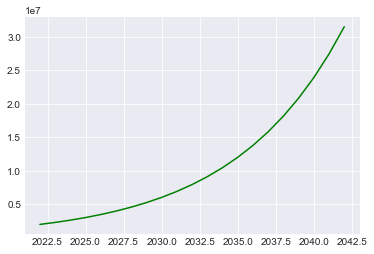

In [115]:
fig, ax1 = plt.subplots()

x = no_hoard['Date']
y1 = no_hoard['Wealth']


ax2 = ax1.plot()

ax1.plot(x, y1, 'g-')

# а если хочет продолжать копить?

In [116]:
hoard = pd.DataFrame(columns= ['Date', 'Quote', 'Cig_price', 'Count_shares', 'Wealth'])

In [117]:
hoard.Date = [datetime.datetime(i, 12, 30) for i in range(2022, 2043)]
hoard

,Date,Quote,Cig_price,Count_shares,Wealth
0,2022-12-30,NaN,NaN,NaN,NaN
1,2023-12-30,NaN,NaN,NaN,NaN
2,2024-12-30,NaN,NaN,NaN,NaN
3,2025-12-30,NaN,NaN,NaN,NaN
4,2026-12-30,NaN,NaN,NaN,NaN
5,2027-12-30,NaN,NaN,NaN,NaN
6,2028-12-30,NaN,NaN,NaN,NaN
7,2029-12-30,NaN,NaN,NaN,NaN
8,2030-12-30,NaN,NaN,NaN,NaN
9,2031-12-30,NaN,NaN,NaN,NaN


In [118]:
hoard.Quote = no_hoard.Quote
hoard

,Date,Quote,Cig_price,Count_shares,Wealth
0,2022-12-30,28.090800,NaN,NaN,NaN
1,2023-12-30,32.234193,NaN,NaN,NaN
2,2024-12-30,36.988736,NaN,NaN,NaN
3,2025-12-30,42.444575,NaN,NaN,NaN
4,2026-12-30,48.705150,NaN,NaN,NaN
5,2027-12-30,55.889160,NaN,NaN,NaN
6,2028-12-30,64.132811,NaN,NaN,NaN
7,2029-12-30,73.592400,NaN,NaN,NaN
8,2030-12-30,84.447279,NaN,NaN,NaN
9,2031-12-30,96.903253,NaN,NaN,NaN


In [119]:
hoard.Cig_price = [(319.69 * 365) * (1.085 ** i) for i in range(1, 22)]

In [120]:
hoard

,Date,Quote,Cig_price,Count_shares,Wealth
0,2022-12-30,28.090800,126605.232250,NaN,NaN
1,2023-12-30,32.234193,137366.676991,NaN,NaN
2,2024-12-30,36.988736,149042.844536,NaN,NaN
3,2025-12-30,42.444575,161711.486321,NaN,NaN
4,2026-12-30,48.705150,175456.962658,NaN,NaN
5,2027-12-30,55.889160,190370.804484,NaN,NaN
6,2028-12-30,64.132811,206552.322865,NaN,NaN
7,2029-12-30,73.592400,224109.270309,NaN,NaN
8,2030-12-30,84.447279,243158.558285,NaN,NaN
9,2031-12-30,96.903253,263827.035740,NaN,NaN


In [121]:
# hoard.Count_shares = 
for i in range(len(hoard.Date)):
    if i == 0:
        hoard.Count_shares[i] =71537 + hoard.Cig_price[i] // hoard.Quote[i]
    else:
       hoard.Count_shares[i] =hoard.Count_shares[i-1] + hoard.Cig_price[i] // hoard.Quote[i] 


C:\Users\Danil\AppData\Local\Temp/ipykernel_10152/590759160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hoard.Count_shares[i] =71537 + hoard.Cig_price[i] // hoard.Quote[i]
C:\Users\Danil\AppData\Local\Temp/ipykernel_10152/590759160.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hoard.Count_shares[i] =hoard.Count_shares[i-1] + hoard.Cig_price[i] // hoard.Quote[i]


In [122]:
hoard.Wealth = hoard.Quote * hoard.Count_shares
hoard

,Date,Quote,Cig_price,Count_shares,Wealth
0,2022-12-30,28.090800,126605.232250,76043.0,2136108.7044
1,2023-12-30,32.234193,137366.676991,80304.0,2588534.634672
2,2024-12-30,36.988736,149042.844536,84333.0,3119371.112514
3,2025-12-30,42.444575,161711.486321,88142.0,3741149.738152
4,2026-12-30,48.705150,175456.962658,91744.0,4468405.274553
5,2027-12-30,55.889160,190370.804484,95150.0,5317853.529932
6,2028-12-30,64.132811,206552.322865,98370.0,6308744.575627
7,2029-12-30,73.592400,224109.270309,101415.0,7463373.25892
8,2030-12-30,84.447279,243158.558285,104294.0,8807344.531273
9,2031-12-30,96.903253,263827.035740,107016.0,10370198.503812


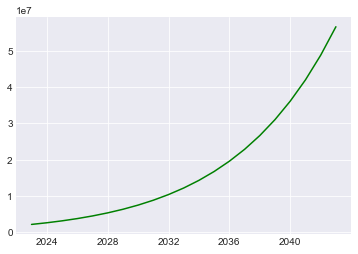

In [123]:
fig, ax1 = plt.subplots()

x = hoard['Date']
y1 = hoard['Wealth']


ax2 = ax1.plot()

ax1.plot(x, y1, 'g-')

In [124]:
hoard.to_excel('по плану.xlsx')
no_hoard.to_excel('после 10 лет не копим.xlsx')